In [19]:
%matplotlib inline 
import matplotlib.pylab as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns 


# --- my functions --- 
import feature_engineering as FE

# --- read data ---- 
DroughtData = pd.read_csv('datasets/Droughts_satelite_and_events.csv')
districts_with_droughts = pd.read_csv('datasets/districts_with_droughts_Uganda_Kenya.csv')
DroughtData.head()

,Country,District,year,month,day,date,NDVI,EVI,precipitation_per_hour_v1,precipitation_per_hour_v2,...,SPEI_6month,SPEI_7month,SPEI_8month,SPEI_9month,SPEI_10month,SPEI_11month,SPEI_12month,drought_reported,drought_news_article,drought_desinventar
0,Uganda,ABIM,2000,3,1,2000-03-01,0.270712,0.137156,0.031873,5.285528,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
1,Uganda,ABIM,2000,4,1,2000-04-01,0.368438,0.184616,0.172345,84.424662,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
2,Uganda,ABIM,2000,5,1,2000-05-01,0.624764,0.365380,0.185952,100.613865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
3,Uganda,ABIM,2000,6,1,2000-06-01,0.669868,0.416891,0.205662,91.973897,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
4,Uganda,ABIM,2000,7,1,2000-07-01,0.717746,0.458402,0.157562,67.037938,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False


## remove satellite data 

In [20]:
reduced_data = FE.reduce_dataset(DroughtData, districts_with_droughts, keep_years=1)

length original data:  39532
length reduced data:  7871


## apply sliding window 

In [3]:
window_size = 3
window_data = FE.sliding_window(reduced_data, window_size)

In [4]:
window_data.head()

,Country,Date_start_window,District,EVI_med,EVI_min,NDVI_med,NDVI_min,SPEI_10month_med,SPEI_10month_min,SPEI_11month_med,...,rainfall_med,rainfall_min,surface_temperature_daytime_max,surface_temperature_daytime_med,surface_temperature_nighttime_max,surface_temperature_nighttime_med,wind_speed_max,wind_speed_med,wind_speed_min,drought_reported
0,Uganda,2001-01-01,ABIM,0.134267,0.131998,0.305885,0.290336,1.145104,1.018551,0.885938,...,0.000005,0.000003,315.018855,312.572779,294.232079,292.910342,7.025618,6.015252,5.004887,False
1,Uganda,2001-02-01,ABIM,0.136537,0.131998,0.294246,0.290336,1.212956,1.018551,0.986999,...,0.000006,0.000003,315.265358,315.018855,294.444529,294.232079,7.025618,6.539992,5.004887,False
2,Uganda,2001-03-01,ABIM,0.158305,0.136537,0.294246,0.290336,1.212956,0.131476,0.986999,...,0.000039,0.000003,315.265358,315.018855,294.444529,294.232079,7.025618,6.539992,5.153910,False
3,Uganda,2001-04-01,ABIM,0.334390,0.158305,0.590362,0.294246,0.131476,0.072971,0.789773,...,0.000056,0.000039,315.265358,306.551851,294.444529,292.858063,6.539992,5.153910,3.024279,False
4,Uganda,2001-05-01,ABIM,0.404104,0.334390,0.609266,0.590362,0.131476,0.072971,0.339320,...,0.000059,0.000056,306.551851,301.793161,292.858063,291.998724,5.153910,3.024279,2.431420,False


## apply Z-norm (by district) 

In [17]:

features = []
for column_name in window_data.columns:
    if ('_min' in column_name) or ('_max' in column_name) or ('_med' in column_name):
        if ('SPEI' not in column_name):
            features.append(column_name)
non_features = list(window_data.columns.drop(features))

normed_data = FE.norm_by_district(window_data,features_no_norm=non_features)

# check correlation

/Users/mklein1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/Users/mklein1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/Users/mklein1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until 

/Users/mklein1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/Users/mklein1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/Users/mklein1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until 

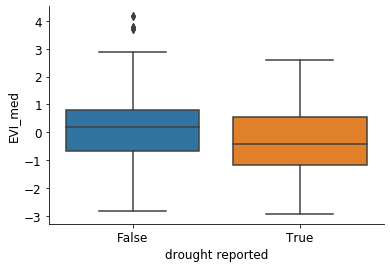

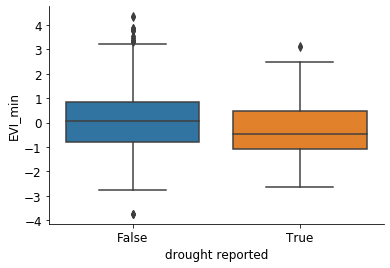

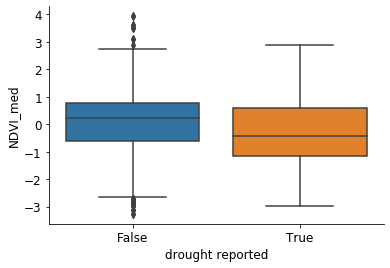

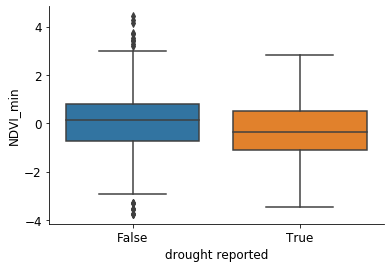

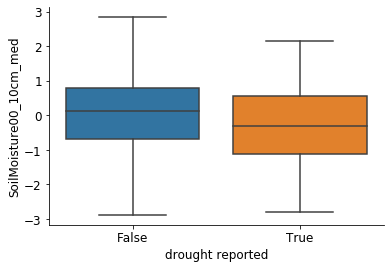

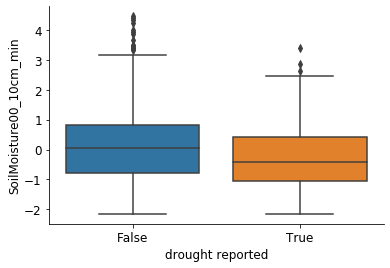

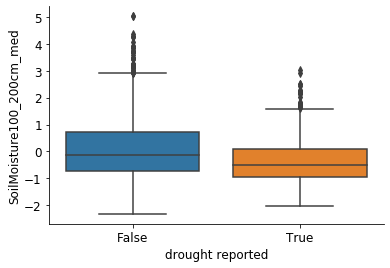

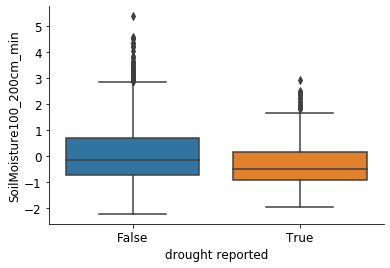

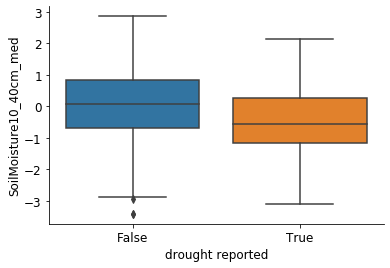

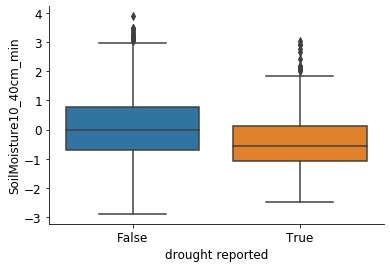

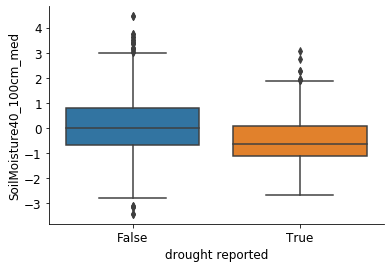

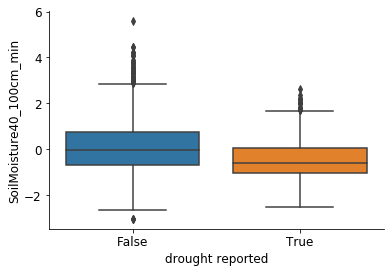

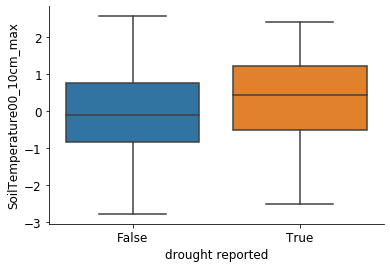

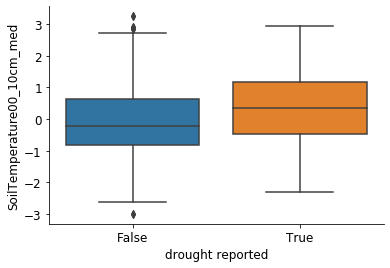

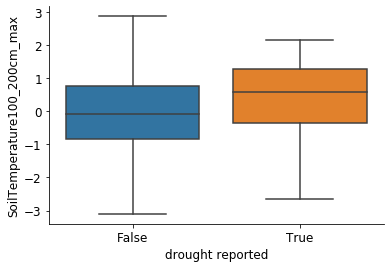

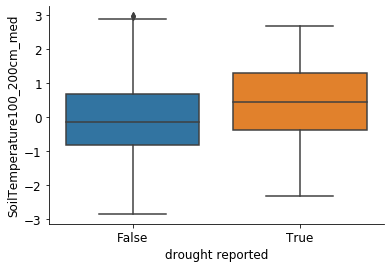

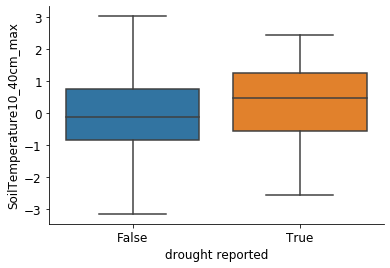

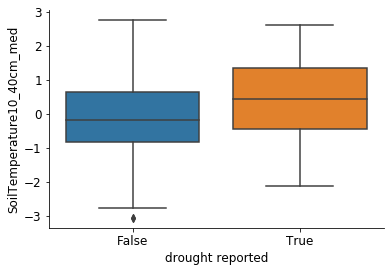

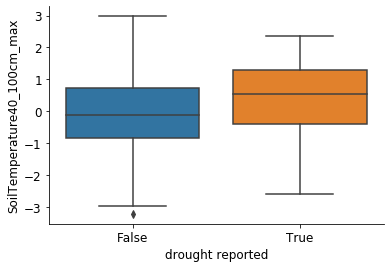

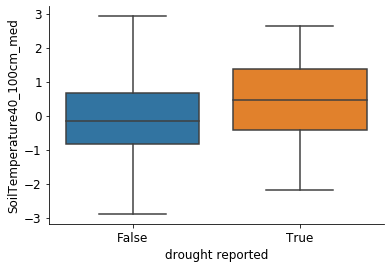

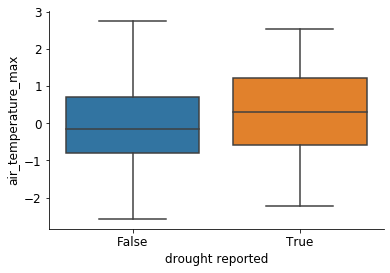

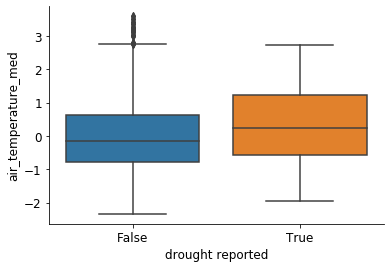

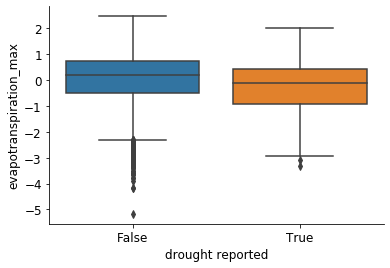

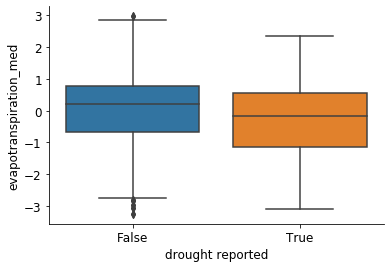

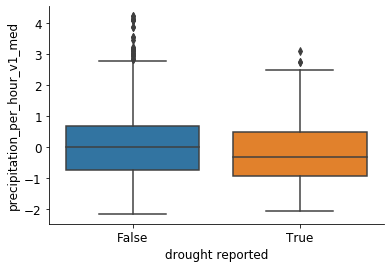

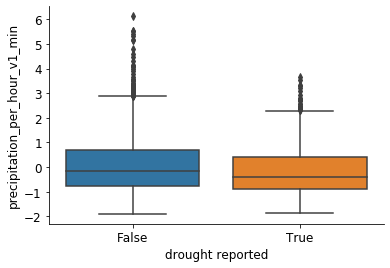

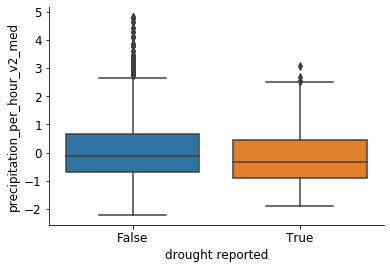

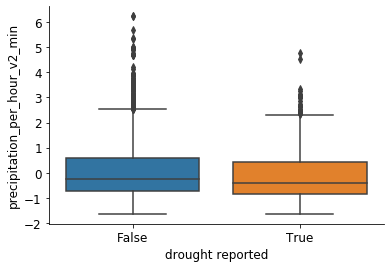

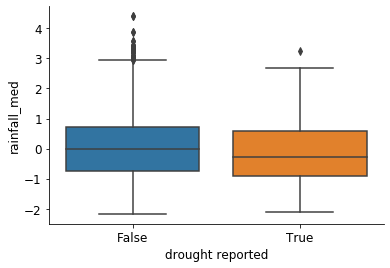

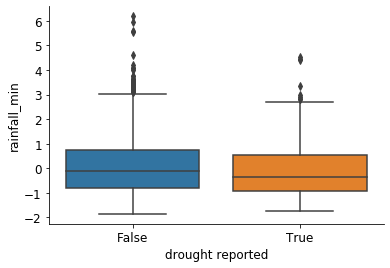

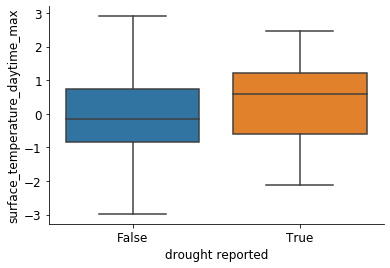

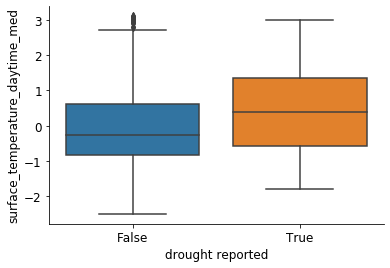

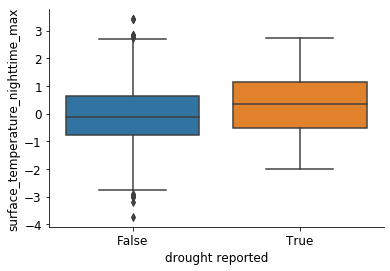

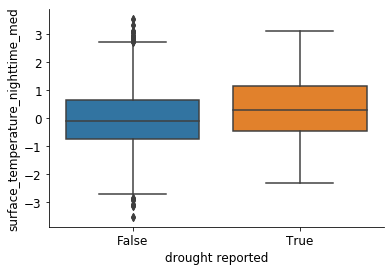

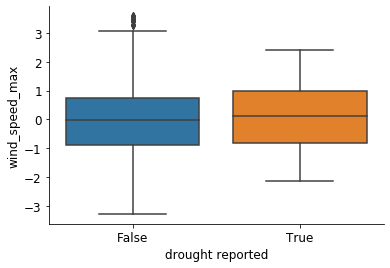

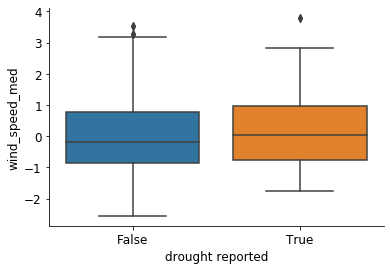

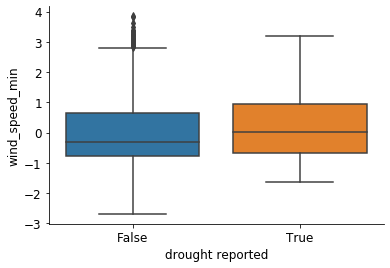

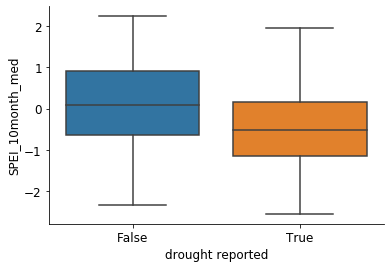

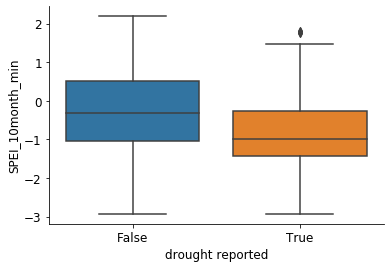

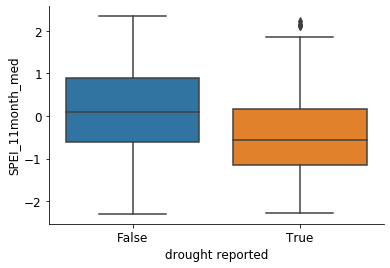

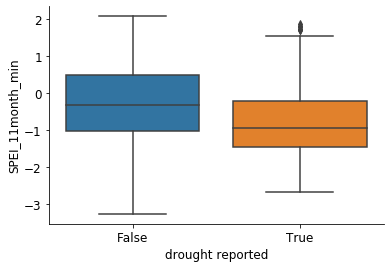

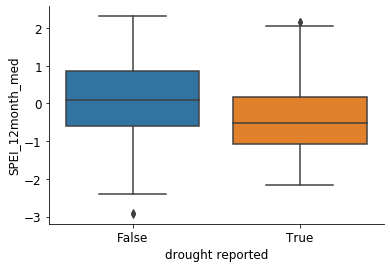

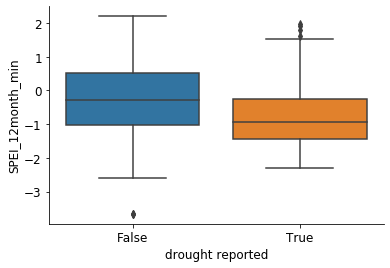

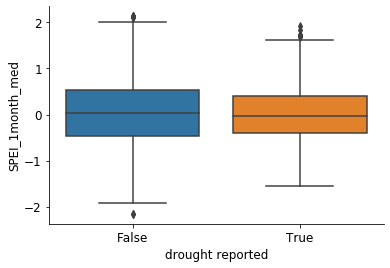

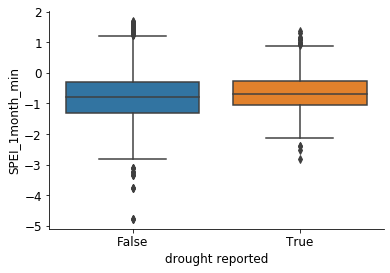

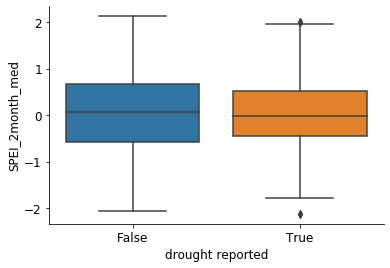

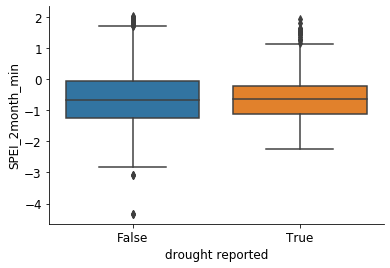

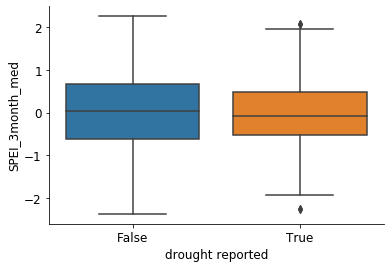

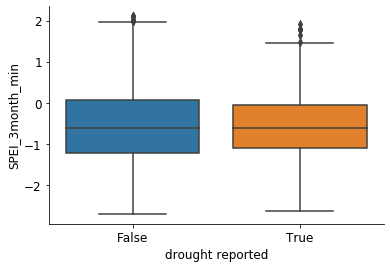

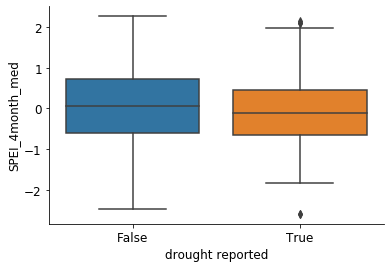

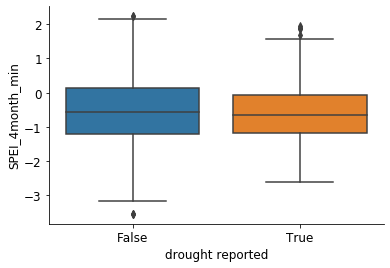

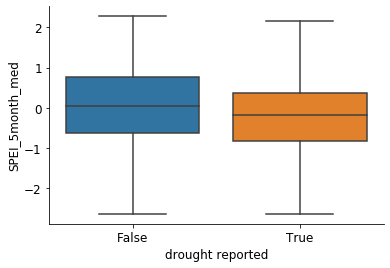

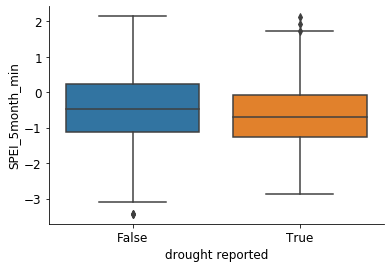

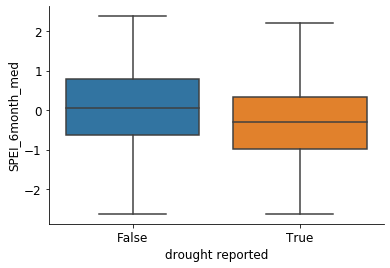

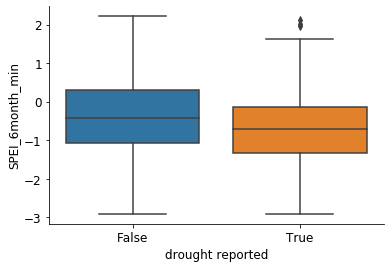

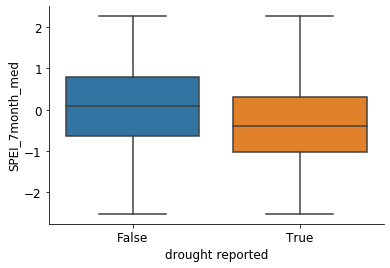

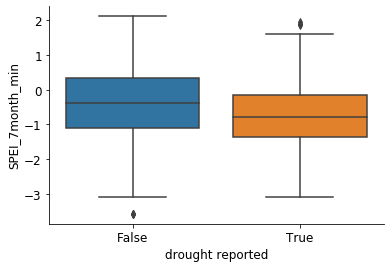

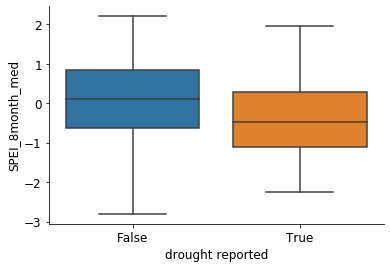

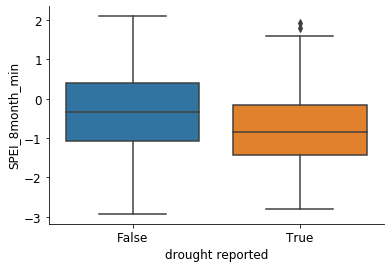

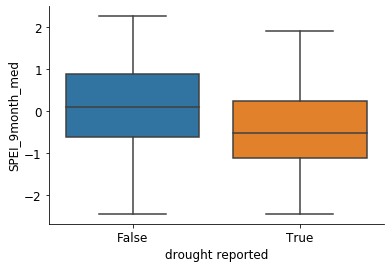

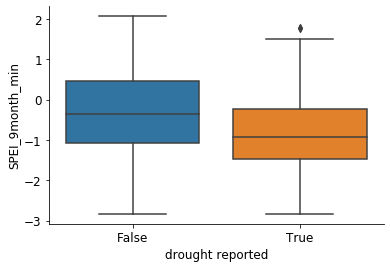

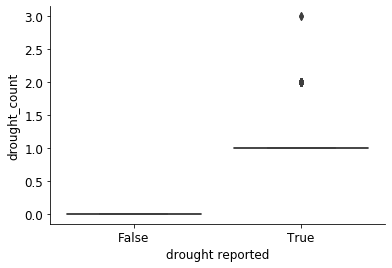

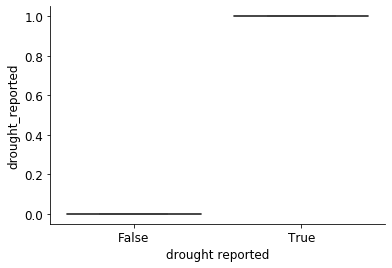

In [22]:
indicators = list(normed_data.columns.drop(['Country','District','Date_start_window']))

for var in indicators:
    plt.figure()
    sns.boxplot(x='drought_reported',y=var,data=normed_data);
    plt.xlabel('drought reported', fontsize=12,color='black')
    plt.ylabel(var, fontsize=12, color="black")
    plt.xticks(rotation=0,fontsize=12, color="black")
    plt.yticks(fontsize=12, color="black");
    sns.despine();